# Guia do funcionamento da Simulação do Blind Quantum Computing
##### O documento tem o objetivo de demostrar o funcionamento da simulação dos protocolos Childs e BFK no BQC.
#### IMPORTANDO AS DEPENDÊNCIAS


In [1]:
import random
from quantumnet.components import Network, Host
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

##### É inicializada a rede, com uma topologia de grade, que apresenta 1 servidor (nó verde) e 8 clientes (nós vermelhos).

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


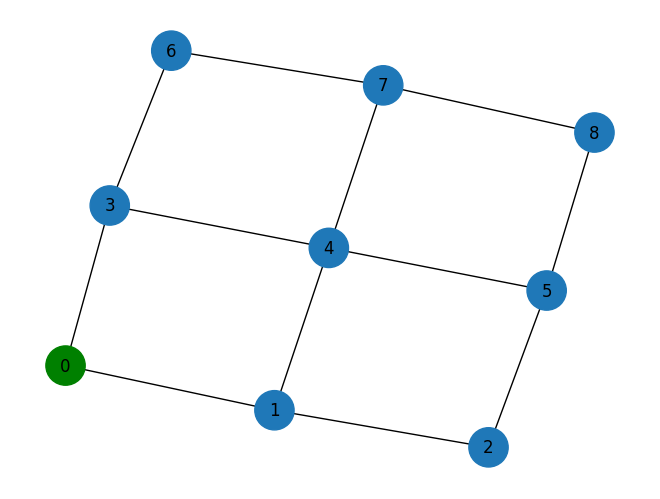

In [2]:
rede = Network()
rede.set_ready_topology('grade',8,3,3)  # Exemplo de uma grade 3x3 com  clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

##### A realização da simulação de uma requesição acontece de forma em que vamos passar uma função para a geração de um circuito aleatório com o número de qubits e número de portas passados como parâmetros e a escolha de um protocolo para executar esse circuito. O protocolo escolhido foi o AC_BQC, Childs, e o cliente é (alice_id).

In [3]:
circuit, num_qubits = rede.generate_random_circuit(num_qubits=20, num_gates=30) 
rede.application_layer.run_app("AC_BQC", alice_id=6, bob_id=0, num_qubits=num_qubits,scenario=1)

                                                              
 q_0: ─────────────────■──────────────────────────────────────
                ┌───┐  │                                      
 q_1: ──────────┤ X ├──┼──────────────────────────────────────
                └─┬─┘  │            ┌───┐                     
 q_2: ──X─────────┼────┼─────────■──┤ T ├─────────────────────
        │         │    │         │  └───┘                     
 q_3: ──┼─────────┼────┼─────────┼────────────X───────────────
        │  ┌───┐  │    │         │            │               
 q_4: ──┼──┤ S ├──┼────┼─────────┼────────────┼───────────────
        │  ├───┤  │    │  ┌───┐  │            │               
 q_5: ──┼──┤ X ├──┼────┼──┤ X ├──┼────────────┼───────────────
        │  └───┘  │    │  └───┘  │            │  ┌───┐┌───┐   
 q_6: ──X─────────┼────┼─────────┼────X───X───┼──┤ X ├┤ X ├───
                  │    │         │    │   │   │  └─┬─┘└───┘   
 q_7: ────────────┼────■─────────┼────┼───┼───┼────■───

2024-12-13 12:27:53,587: Circuito aleatório gerado com 20 qubits e 30 portas. Instruções sobre o circuito.
2024-12-13 12:27:53,588: Instrução: {'operation': 'swap', 'qubits': [2, 6]}


2024-12-13 12:27:53,590: Instrução: {'operation': 'x', 'qubits': [5]}
2024-12-13 12:27:53,590: Instrução: {'operation': 'cx', 'qubits': [9, 1]}
2024-12-13 12:27:53,591: Instrução: {'operation': 'y', 'qubits': [17]}
2024-12-13 12:27:53,592: Instrução: {'operation': 'cx', 'qubits': [16, 19]}
2024-12-13 12:27:53,592: Instrução: {'operation': 'cz', 'qubits': [7, 0]}
2024-12-13 12:27:53,593: Instrução: {'operation': 'x', 'qubits': [15]}
2024-12-13 12:27:53,593: Instrução: {'operation': 'z', 'qubits': [14]}
2024-12-13 12:27:53,594: Instrução: {'operation': 'y', 'qubits': [11]}
2024-12-13 12:27:53,594: Instrução: {'operation': 'x', 'qubits': [15]}
2024-12-13 12:27:53,596: Instrução: {'operation': 'swap', 'qubits': [13, 8]}
2024-12-13 12:27:53,597: Instrução: {'operation': 'cx', 'qubits': [2, 19]}
2024-12-13 12:27:53,597: Instrução: {'operation': 'y', 'qubits': [11]}
2024-12-13 12:27:53,598: Instrução: {'operation': 'swap', 'qubits': [6, 17]}
2024-12-13 12:27:53,598: Instrução: {'operation': '

##### Nesse caso, foi executado o protocolo BFK, com parâmetros como 5 qubits para 5 rounds e 30 portas. Além da escolha de um nó como cliente= alice_id.

In [4]:
circuito, num_qubits = rede.generate_random_circuit(num_qubits=5, num_gates=30)
resultado_bfk = rede.application_layer.run_app("BFK_BQC", alice_id=2, bob_id=0, num_qubits=num_qubits, num_rounds=5)

                ┌───┐                                                          »
q_0: ─────────■─┤ T ├──────────────────────────────■────────X────────X──■──────»
              │ ├───┤┌───┐┌───┐┌───┐   ┌───┐┌───┐┌─┴─┐┌───┐ │        │  │ ┌───┐»
q_1: ─X───X───┼─┤ Y ├┤ H ├┤ X ├┤ X ├─■─┤ S ├┤ Z ├┤ X ├┤ S ├─┼─────X──X──■─┤ X ├»
      │   │   │ └───┘└───┘└─┬─┘├───┤ │ └───┘└───┘└───┘└───┘ │     │       └─┬─┘»
q_2: ─┼───X───┼─────────────■──┤ X ├─┼──────────────────────┼─────┼──X──────■──»
      │ ┌───┐ │                └─┬─┘ │ ┌───┐                │     │  │         »
q_3: ─┼─┤ H ├─┼──────────────────■───┼─┤ S ├────────────────┼──■──X──┼──■──────»
      │ └───┘ │                      │ └───┘                │  │     │  │      »
q_4: ─X───────■──────────────────────■──────────────────────X──■─────X──■──────»
                                                                               »
«                            
«q_0: ──■──────────────────X─
«       │  ┌───┐           │ 
«q_1: ──┼──┤ Z ├───

2024-12-13 12:27:54,834: Circuito aleatório gerado com 5 qubits e 30 portas. Instruções sobre o circuito.
2024-12-13 12:27:54,835: Instrução: {'operation': 'swap', 'qubits': [4, 1]}
2024-12-13 12:27:54,836: Instrução: {'operation': 'swap', 'qubits': [2, 1]}
2024-12-13 12:27:54,836: Instrução: {'operation': 'y', 'qubits': [1]}
2024-12-13 12:27:54,837: Instrução: {'operation': 'h', 'qubits': [3]}
2024-12-13 12:27:54,837: Instrução: {'operation': 'h', 'qubits': [1]}
2024-12-13 12:27:54,839: Instrução: {'operation': 'cx', 'qubits': [2, 1]}
2024-12-13 12:27:54,839: Instrução: {'operation': 'cz', 'qubits': [0, 4]}
2024-12-13 12:27:54,840: Instrução: {'operation': 'x', 'qubits': [1]}
2024-12-13 12:27:54,841: Instrução: {'operation': 'cz', 'qubits': [4, 1]}
2024-12-13 12:27:54,842: Instrução: {'operation': 's', 'qubits': [1]}
2024-12-13 12:27:54,842: Instrução: {'operation': 'cx', 'qubits': [3, 2]}
2024-12-13 12:27:54,844: Instrução: {'operation': 't', 'qubits': [0]}
2024-12-13 12:27:54,845: I

##### Nessa função, podemos coletar a métrica da média da fidelidade dos pares EPRs utilizados nas duas requesições.

In [5]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9149


0.9149496908375903

##### Além de printar as fidelidades das rotas.

In [6]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
0.9198
0.8964
0.8953
0.9874
0.9279
0.9231
0.9157
0.9166
0.9387
0.8975
0.9542
0.9411
0.9313
0.9367
0.9269
0.9353
0.9405
0.8833
0.9458
0.9016
0.8943
0.8725
0.8723
0.9630
0.9058
0.9021
0.8957
0.8975
0.9201
0.8806
0.9371
0.9252
0.9165
0.9227
0.9140
0.9232
0.9292
0.8736
0.9364
0.8935
0.8860
0.9176
0.8557
0.9048
0.9185


##### Pode ser coletado os EPRs utilizados na camada de aplicação, consequentemente nas requesições e protocolos.

In [7]:
#rede.application_layer.print_used_eprs()

In [8]:
rede.get_total_useds_eprs()

2024-12-13 12:27:55,023: Eprs usados na camada PhysicalLayer: 40
2024-12-13 12:27:55,025: Eprs usados na camada LinkLayer: 0
2024-12-13 12:27:55,038: Eprs usados na camada NetworkLayer: 0
2024-12-13 12:27:55,045: Eprs usados na camada ApplicationLayer: 90


130

In [9]:
#taxadesucesso